# Multivariate Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

1. salary has null values

In [4]:
data.fillna(0,inplace=True)

Filling them with zeros, which is acceptable technically and avoid NaN's

### Discovering other correlations

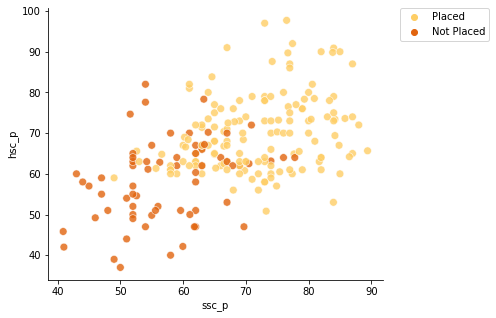

In [5]:
fig, ax = plt.subplots(figsize = (6,5))
sns.scatterplot(x="ssc_p",
                    y="hsc_p",
                    hue="status",
                    data=data,s = 60, marker='o', alpha=0.8, palette='YlOrBr')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)


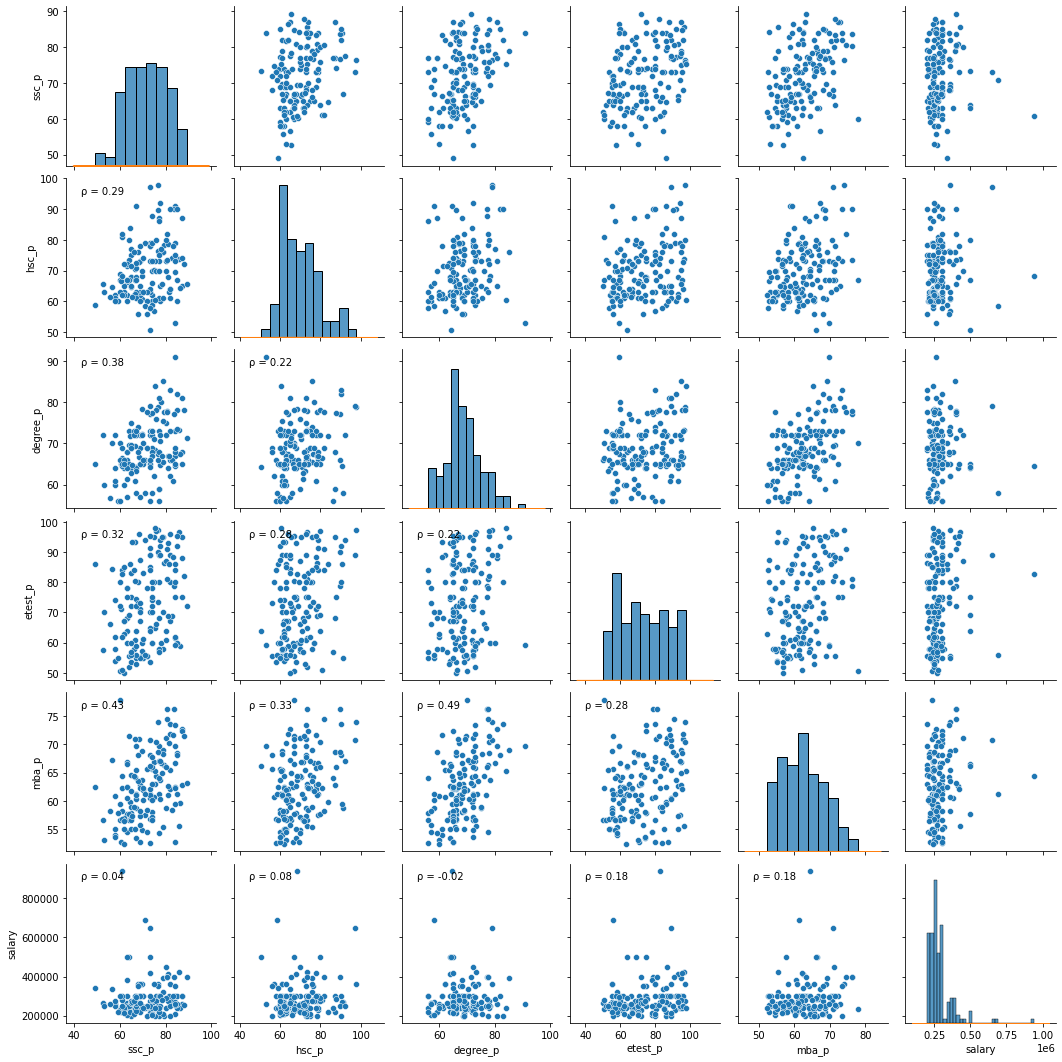

In [6]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
df = data[data['salary'] != 0]

g = sns.pairplot(df)
g = g.map_lower(corrfunc)
g = g.map_diag(sns.kdeplot, shade = True)

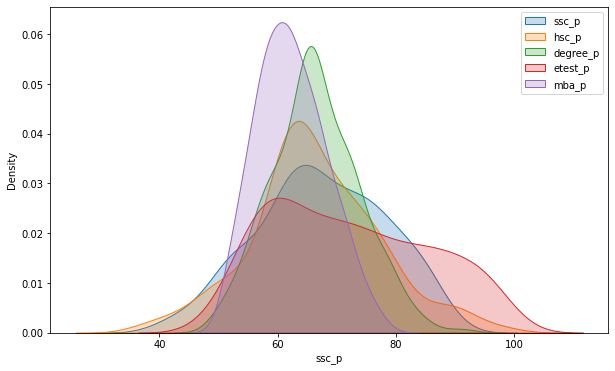

In [7]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(data['ssc_p'], shade=True, palette='YlOrBr')
sns.kdeplot(data['hsc_p'], shade=True, palette='YlOrBr')
sns.kdeplot(data['degree_p'], shade=True, palette='YlOrBr')
sns.kdeplot(data['etest_p'], shade=True, palette='YlOrBr')
sns.kdeplot(data['mba_p'], shade=True, palette='YlOrBr')

plt.legend(['ssc_p','hsc_p','degree_p','etest_p','mba_p'])
plt.show()

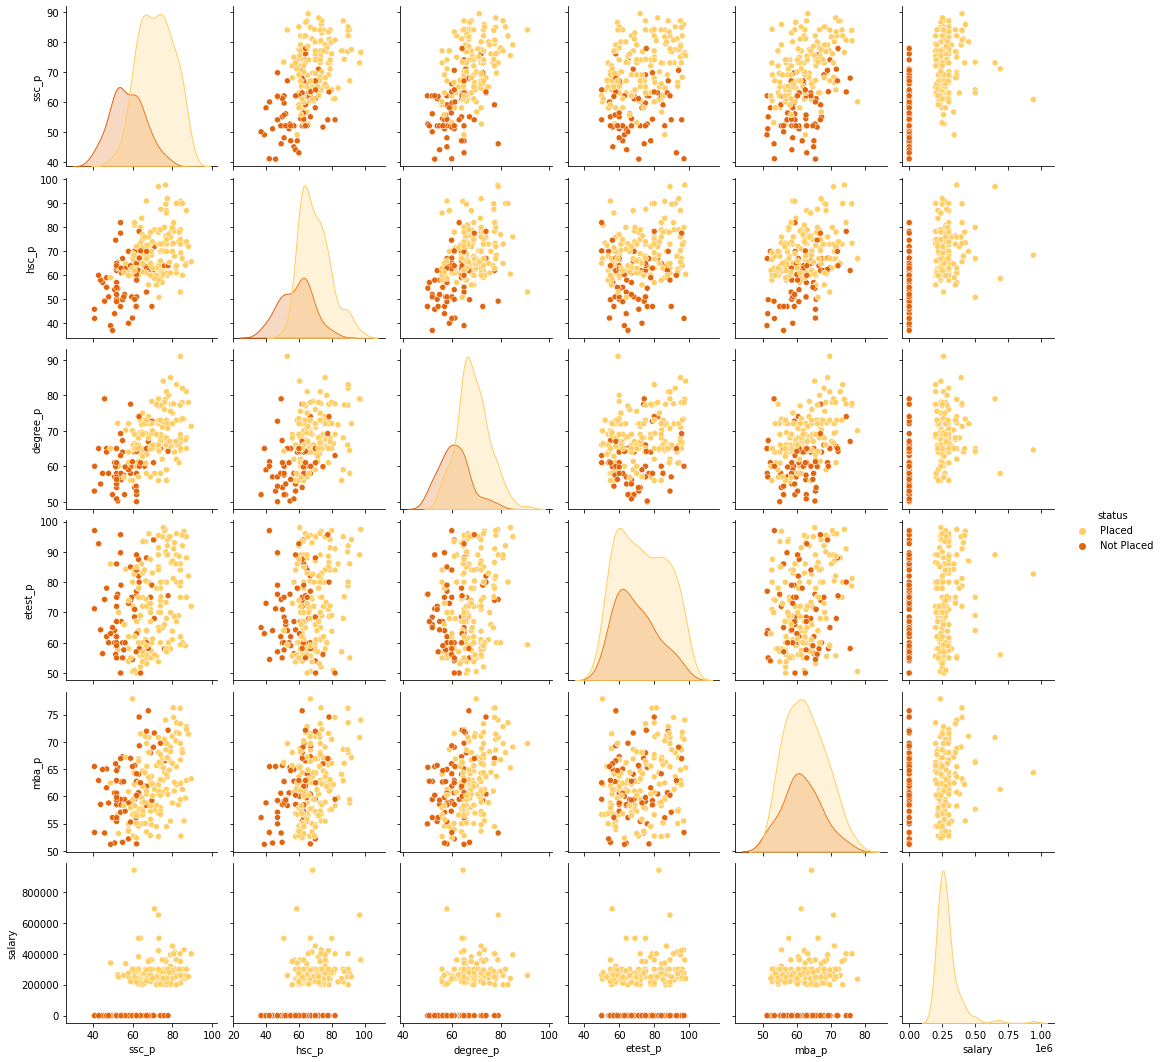

In [8]:
sns.pairplot(data,hue = 'status', palette='YlOrBr')

<AxesSubplot:>

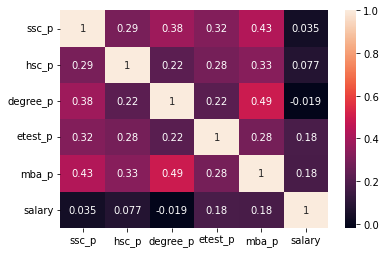

In [9]:
sns.heatmap(df.corr(), annot=True)

## Important Violin Plots

### ssc_p by ssc_b with status

Text(0.5, 1.0, 'Violin Plot of ssc_p by ssc_b with status')

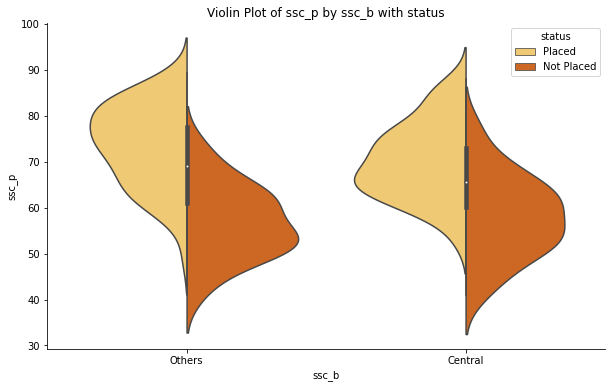

In [10]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='ssc_b',y="ssc_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of ssc_p by ssc_b with status")

### hsc_p by hsc_b with status

Text(0.5, 1.0, 'Violin Plot of hsc_p by hsc_b with status')

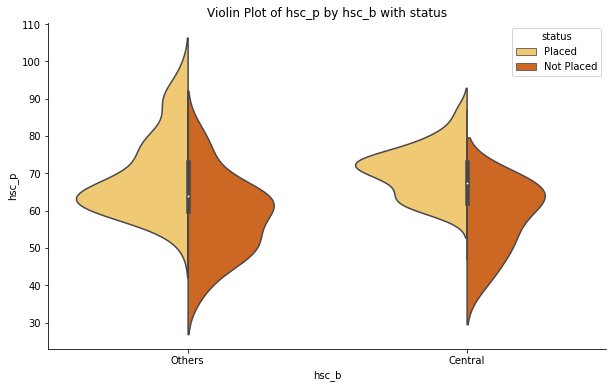

In [11]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='hsc_b',y="hsc_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of hsc_p by hsc_b with status")

### hsc_p by hsc_s with status

Text(0.5, 1.0, 'Violin Plot of hsc_p by hsc_s with status')

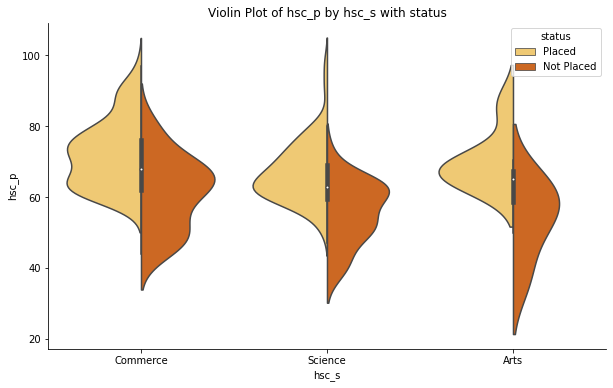

In [12]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='hsc_s',y="hsc_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of hsc_p by hsc_s with status")

### hsc_p by hsc_s with hsc_b

Text(0.5, 1.0, 'Violin Plot of hsc_p by hsc_s with hsc_b')

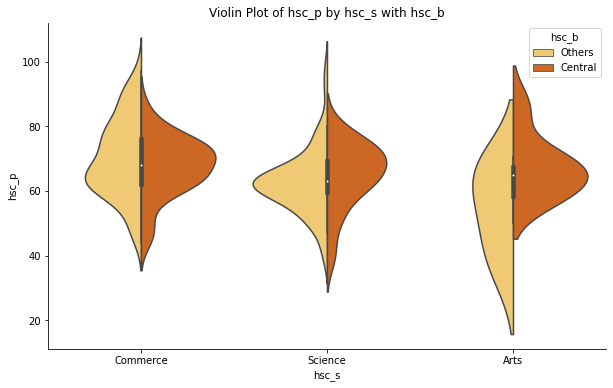

In [13]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='hsc_s',y="hsc_p",data=data,hue = 'hsc_b',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of hsc_p by hsc_s with hsc_b")

### degree_p by degree_t with status

Text(0.5, 1.0, 'Violin Plot of degree_p by degree_t with status')

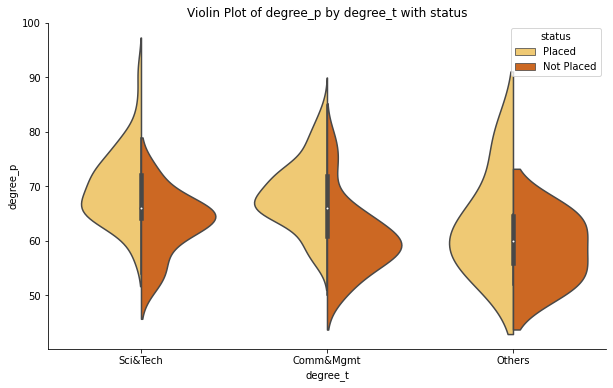

In [14]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='degree_t',y="degree_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of degree_p by degree_t with status")

### etest_p by mba_t with status

Text(0.5, 1.0, 'Violin Plot of etest_p by mba_t with status')

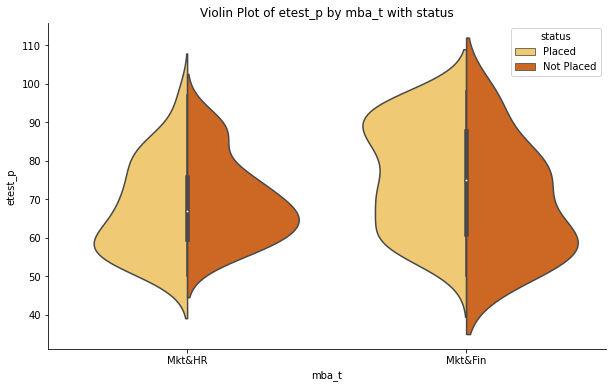

In [15]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='mba_t',y="etest_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of etest_p by mba_t with status")

### etest_p by degree_t with status

Text(0.5, 1.0, 'Violin Plot of etest_p by degree_t with status')

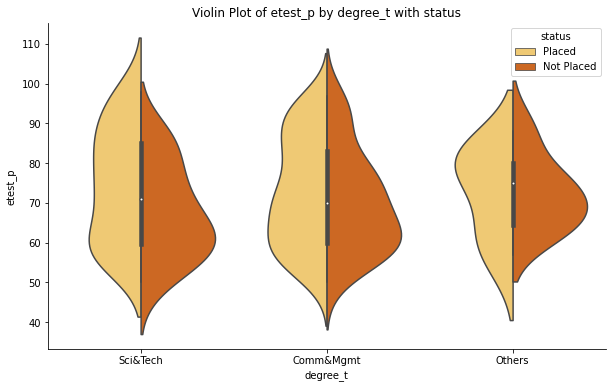

In [16]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='degree_t',y="etest_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of etest_p by degree_t with status")

### mba_p by mba_t with status

Text(0.5, 1.0, 'Violin Plot of mba_p by mba_t with status')

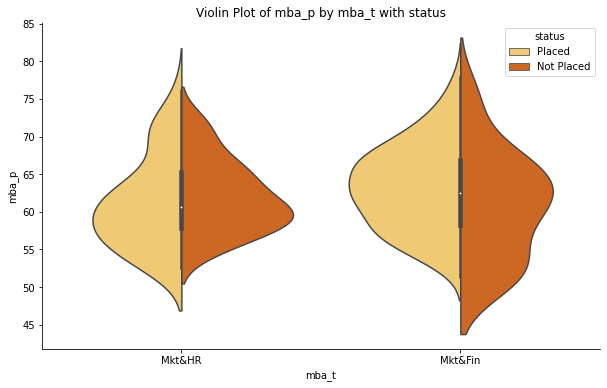

In [17]:
plt.figure(figsize=(10,6))

# For multivariate
sns.violinplot(x='mba_t',y="mba_p",data=data,hue = 'status',split = True, palette='YlOrBr', saturation = 0.8)

ax = plt.subplot()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.title("Violin Plot of mba_p by mba_t with status")